### Import

In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pickle
from ad_plotting import open_pickle, bar_plot, trace_plot, trace_curve_fit

# Fig 5

In [3]:
window = 10
frame_rate = 20

### 5B

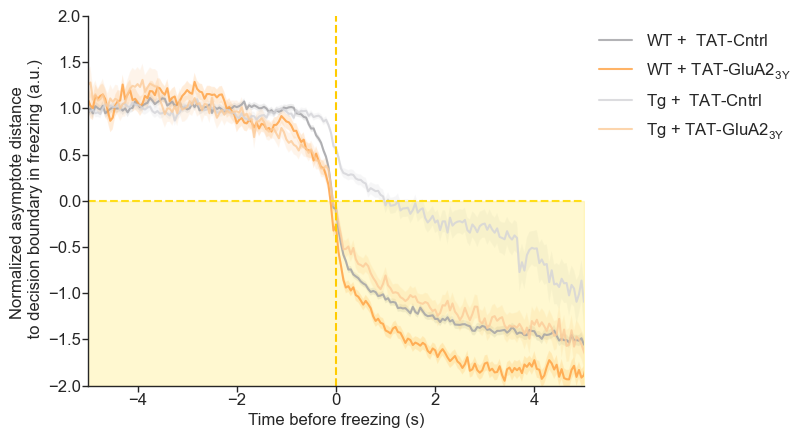

In [4]:
#5B
svm_into_f_dist_res = open_pickle('Data/svm_into_f_dist_res.pkl')

ax = plt.gca()

trace_plot(svm_into_f_dist_res, [4], ax=ax, xs=np.arange(-window, window, 1./frame_rate), 
           ylabel="Normalized asymptote distance \n to decision boundary in freezing (a.u.)", show_err=True)
ax.set_xlim([-5,5])
ax.set_ylim([-2,2])
ax.fill_between([-5, 5], [0, 0], [-2, -2], color="#ffde17", alpha=.2)
ax.axhline(y=0, color="#ffde17", linestyle="--")


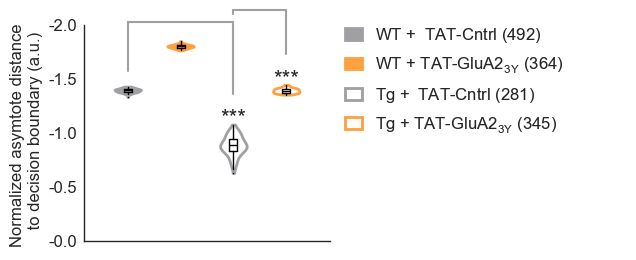

In [6]:
#3B

scaled_logistic = lambda x, k, x0, v_max, v_min: (v_max-v_min) / (1 + np.exp(-k*(x - x0))) + v_min

fix, ax = plt.subplots(1,2, figsize=(7,3))
ax[1].axis('off')

svm_into_f_curve_res = trace_curve_fit(
                    scaled_logistic, 
                    svm_into_f_dist_res, 
                    xs = np.arange(-window, window, 1./frame_rate),
                    #min_f = lambda a,b,c,d,e: \
                    #        -logistic_d2(a,b,c,d,e), 
                    p0 = [0., 1., 1., 0.],
                    min_f = None,
                    #mark_f = lambda k, k0, v_max, v_min: \
                    #        logit(.5, k, k0, v_max, v_min),
                    mark_f = lambda x, x0, v_max, v_min: -v_min,
                    bootstrap=100, 
                    axes=None,
                    per_animal=False,
                    mixture = False,
                    )

q = bar_plot(svm_into_f_curve_res, [4], ax=ax[0], ylabel="Normalized asymtote distance \n to decision boundary (a.u.)", 
         sig_arr=[(0,2),(2,3)], sig_th=.05, show_stat=False, show=False, ylim=[0, 2], error="ci", show_sample_size=True, 
         plot_type="violin", show_legend=True)
ax[0].yaxis.set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: str(-x)))

# fix sample size labels
true_ns = [np.sum([len(i) for i in k]) for k in svm_into_f_dist_res[0]]
for i in range(4):
    legend_txt = q.legend_.get_texts()[i].get_text()
    q.legend_.get_texts()[i].set_text(legend_txt.replace('100', str(true_ns[i])))

### 5C

[<Axes: xlabel='Time before freezing (s)', ylabel='Normalized speed \n to decision boundary (a.u.)'>]

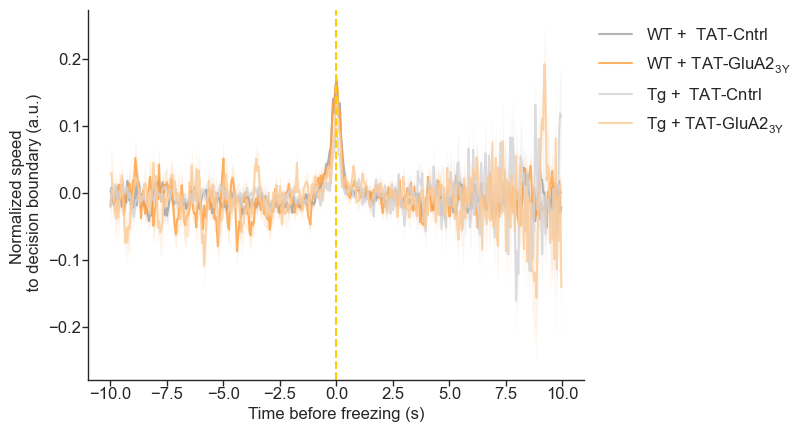

In [7]:
#5C
svm_into_f_speed_res = open_pickle('Data/svm_into_f_speed_res.pkl')

ax = plt.gca()

trace_plot(svm_into_f_speed_res, [4], ax=ax, xs=np.arange(-window, window, 1./frame_rate), 
           ylabel="Normalized speed \n to decision boundary (a.u.)", show_err=True)
 

<Axes: ylabel='Normalized speed \n at time 0 (a.u.)'>

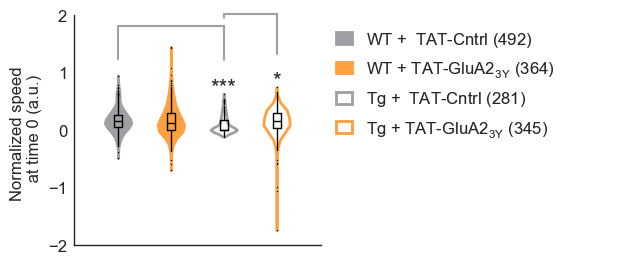

In [8]:
#5C
svm_into_f_speed_at_0_res = open_pickle('Data/svm_into_f_speed_at_0_res.pkl')

fix, ax = plt.subplots(1,2, figsize=(7,3))
ax[1].axis('off')


bar_plot(svm_into_f_speed_at_0_res, [4], ax = ax[0], show_legend=True, show=False, sig_arr=[(0,2),(2,3)], 
         ylabel="Normalized speed \n at time 0 (a.u.)", sig_th=0.01, plot_type="violin", ylim=[-2., 2.])


### 5D

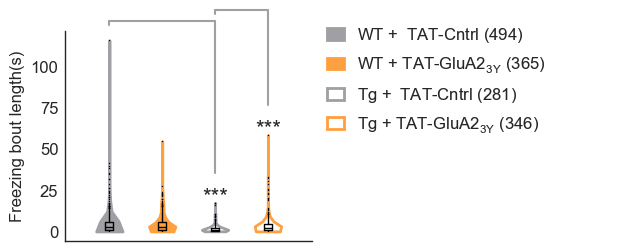

In [9]:
#5D
fbl_res = open_pickle('Data/fbl_res.pkl')

fix, ax = plt.subplots(1,2, figsize=(7,3))
ax[1].axis('off')

bar_plot(fbl_res, [4], ylabel="Freezing bout length(s)", ax=ax[0], show=False, sig_arr=[(0,2),(2,3)], 
         show_stat=False, show_sample_size=True, show_legend=True, sig_th=0.01, plot_type="violin",
         show_data=False)
plt.savefig('Fig 5D.svg', dpi=1080)